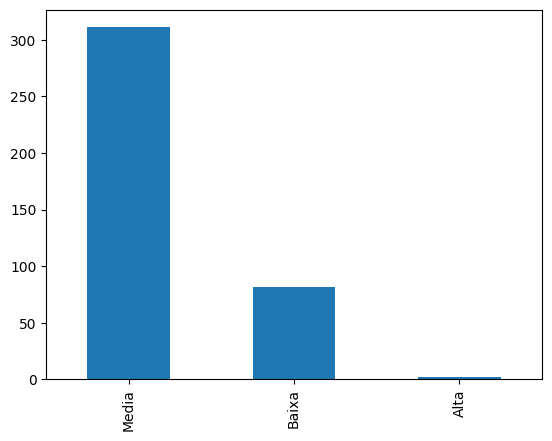

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregue o conjunto de dados student_data do Kaggle
df = pd.read_csv('student_data.csv')

# Preencha os valores ausentes na coluna 'Age' com a idade mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Use a função apply para criar uma nova coluna 'De menor' que indica se um aluno é uma criança menor de 18 anos
df['De_menor'] = df['age'].apply(lambda x: x < 18)

# Renomeie a coluna 'School' para 'Escola'
df.rename(columns={'School': 'Escola'}, inplace=True)

# Calcule a idade média por sexo
avg_idade = df.groupby('sex')['age'].mean()

# Filtrar alunos maiores de 18 e com tempo livre maior que 3
inad_18 = df.query('age >= 18 & freetime >3')

# Crie duas novas colunas: 'avg_media' e 'total_notas'
df['avg_media'] = df['age'] / avg_idade
df['avg_total_notas'] = (df['G1'] + df['G2'] + df['G3']).mean()
maior_media = df["avg_total_notas"].max()

# Use pd.qcut para criar uma nova coluna 'media_notas_por_idade' que divide a coluna 'age' em quartis
df['media_notas_por_idade'] = pd.cut(df['age'], bins=[10, 15, 20, maior_media], labels=['Baixa', 'Media', 'Alta'])

# Gere um gráfico de barras da nota média por sexo aluno
df['media_notas_por_idade'].value_counts().plot.bar()

# Exporte o dataframe modificado para um novo arquivo CSV
df.to_csv('student_data_modificado.csv', index=False)

